# Section 1.3 Population structure (python) 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns; sns.set()

In [16]:
# Loading data
pheno = pd.read_csv('./2017heteroPheno.csv')
I = pd.read_table('./Hetero_realigned_cov10_filtered3.raw',sep="\s+")
bcw=pheno.bcw.as_matrix()
X= I.as_matrix()

## PCA

### Plot of cumulative explained variance 

In [17]:
from sklearn.decomposition import PCA

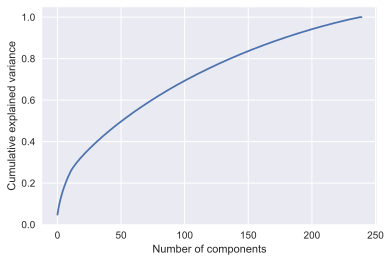

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"
pca = PCA().fit(I)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

### Plot of PC1 and PC2

In [19]:
pca = PCA()
X_r = pca.fit(I).transform(I)

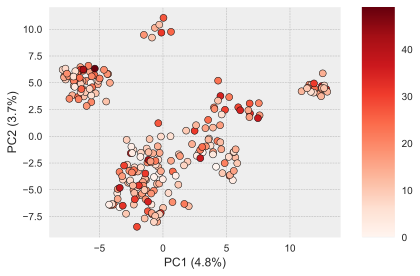

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('bmh')
plt.scatter(X_r[:, 0], X_r[:, 1], edgecolor='k',c=bcw,cmap=cm.Reds)
plt.xlabel('PC%s (%.1f%%)' % (1, np.round(pca.explained_variance_ratio_[0],3)*100))
plt.ylabel('PC%s (%.1f%%)' % (2, np.round(pca.explained_variance_ratio_[1],3)*100))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.savefig("PCA.png",dpi=300)
plt.show()

### Plot of PC3 and PC4

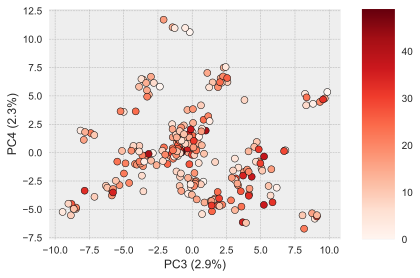

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('bmh')
plt.scatter(X_r[:, 2], X_r[:, 3], edgecolor='k',c=bcw,cmap=cm.Reds)
plt.xlabel('PC%s (%.1f%%)' % (3, np.round(pca.explained_variance_ratio_[2],3)*100))
plt.ylabel('PC%s (%.1f%%)' % (4, np.round(pca.explained_variance_ratio_[3],3)*100))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.savefig("PCA2.png",dpi=300)
plt.show()

## T-SNE

In [22]:
from sklearn.manifold import TSNE

In [23]:
model = TSNE(n_components=2, random_state=0,perplexity=20,
             learning_rate=400,method='exact')
tsne5 = model.fit_transform(X)

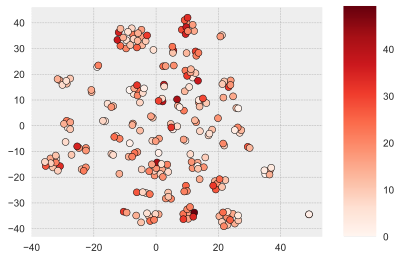

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('bmh')
plt.scatter(tsne5[:, 0], tsne5[:, 1], edgecolor='k',c=bcw,cmap=cm.Reds)
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.savefig("t-SNE.png",dpi=300)
plt.show()